### The IDEAS API demo supported via NASA's Earth Science Technology Office (ESTO) from the Advanced Information Systems Technology (AIST) Program

### Description
- IDEAS API is an arbitrary job management service using OGC Process deployed in AWS. 
- IDEAS API has 2 concept, a process & a job. 
- A processes is an OGC schema backed JSON document which acts as a guide including mandatory  on job management. 
    - Note: Only admins can create processes. 
- A job is an instance of a process with concrete inputs & outputs. 

### IDEAS API Architecture Diagram

<img title="OGC Compliant Ideas API" alt="OGC Compliant Ideas API" src="OGC_Compliant_Ideas_API.png">

### IDEAS API AWS Deployment Diagram
<img title="AWS Infrastructure" alt="AWS Infrastructure" src="Ideas-API-AWS-Infrastructure.png">

In [ ]:
#TODO Include describing POWER -> LIS -> RRR -> RAPID

### Prerequisite
- A JWT Token is required for A&A purposes. This is currently restricted to JPL only.

In [1]:
import getpass
import json
import os
import time
import requests
from datetime import datetime, timedelta
import ideas_modules.plotting as plotting
import ideas_modules.ideas_processing as ideas_processing
import ideas_modules.ocgapi_client as ocgapi_client
from ipywidgets import widgets
import warnings
warnings.filterwarnings("ignore")


BASE_URL = 'https://ideas-digitaltwin.jpl.nasa.gov'
NEXUS_URL = f'{BASE_URL}/nexus'

OGC_PROCESSES_BASE_URL = 'https://1wmygyp8i0.execute-api.us-west-2.amazonaws.com/dev'

VERSION = f'1.0.0'
PROCESS_ID = 'PYTHON-NOTEBOOK:EXAMPLE-API'

In [2]:
jwt_token = getpass.getpass('Enter your password')
headers = {
    'Authorization': f'Bearer {jwt_token}',
    'Content-Type': 'application/json'
}

Enter your password ········


### Listing all processes

In [3]:
processes = ocgapi_client.list_processes(OGC_PROCESSES_BASE_URL, headers)
print(json.dumps(processes, indent=2))

{
  "processes": [
    {
      "id": "IDEAS_PROCESS:LIS_RRR_RAPID",
      "version": "1.0.0",
      "title": "Process Title",
      "description": "Process Description for LIS and RRR + Rapid. Ref: https://github.com/opengeospatial/ogcapi-processes/blob/master/core/examples/json/ProcessDescription.json"
    },
    {
      "id": "PYTHON-NOTEBOOK:EXAMPLE-API",
      "version": "1.0.0",
      "title": "Process Title",
      "description": "Process Description for LIS and RRR + Rapid. Ref: https://github.com/opengeospatial/ogcapi-processes/blob/master/core/examples/json/ProcessDescription.json"
    },
    {
      "id": "UNIT-TEST:EXAMPLE-API",
      "version": "0.0.1121",
      "title": "Process Title",
      "description": "Process Description for LIS and RRR + Rapid. Ref: https://github.com/opengeospatial/ogcapi-processes/blob/master/core/examples/json/ProcessDescription.json"
    },
    {
      "id": "UNIT-TEST:EXAMPLE-API",
      "version": "0.0.1123",
      "title": "Process Title",
 

### Get a process details using process ID & version to create a job

In [4]:
process_detail = ocgapi_client.get_process(OGC_PROCESSES_BASE_URL, PROCESS_ID, VERSION, headers)
print(json.dumps(process_detail, indent=2))

{
  "id": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "title": "Process Title",
  "description": "Process Description for LIS and RRR + Rapid. Ref: https://github.com/opengeospatial/ogcapi-processes/blob/master/core/examples/json/ProcessDescription.json",
  "version": "1.0.0",
  "jobControlOptions": [
    "sync-execute"
  ],
  "outputTransmission": [
    "value"
  ],
  "additionalParameters": {
    "parameters": [
      {
        "name": "stagesCount",
        "value": [
          "2"
        ]
      },
      {
        "name": "stage001Names",
        "value": [
          "LIS"
        ]
      },
      {
        "name": "stage002Names",
        "value": [
          "RRR",
          "RAPID"
        ]
      }
    ]
  },
  "inputs": {
    "executingStageFlags": {
      "title": "mandatory input to describe which stages need to be executed",
      "description": "Boolean array to indicate which stages to be executed. each array index corresponds to each stage which where the details can be found in #

### Use LIS outputs to trigger RAPID

In [5]:
miss_basin_bb = {'min_lon': -117, 'max_lon': -80, 'min_lat': 27.5, 'max_lat': 54}
miss_start    = datetime(2018, 1, 15)
miss_end      = datetime(2018, 5, 1)
miss_lis_noahmp_basin_params = [(NEXUS_URL, ds, miss_basin_bb, miss_start, miss_end) for ds in ['LIS_miss_chirps_2x_3hr_Qs_tavg', 'LIS_miss_chirps_2x_3hr_Qsb_tavg']]

In [6]:
lis_noahmp_miss_tavg = [ideas_processing.temporal_mean(*miss_param) for miss_param in miss_lis_noahmp_basin_params]

url
 https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeAvgMapSpark?ds=LIS_miss_chirps_2x_3hr_Qs_tavg&b=-117,27.5,-80,54&startTime=2018-01-15T00:00:00Z&endTime=2018-05-01T00:00:00Z

Waiting for response from IDEAS... took 9.63981979098753 seconds
url
 https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeAvgMapSpark?ds=LIS_miss_chirps_2x_3hr_Qsb_tavg&b=-117,27.5,-80,54&startTime=2018-01-15T00:00:00Z&endTime=2018-05-01T00:00:00Z

Waiting for response from IDEAS... took 1.2179340840084478 seconds


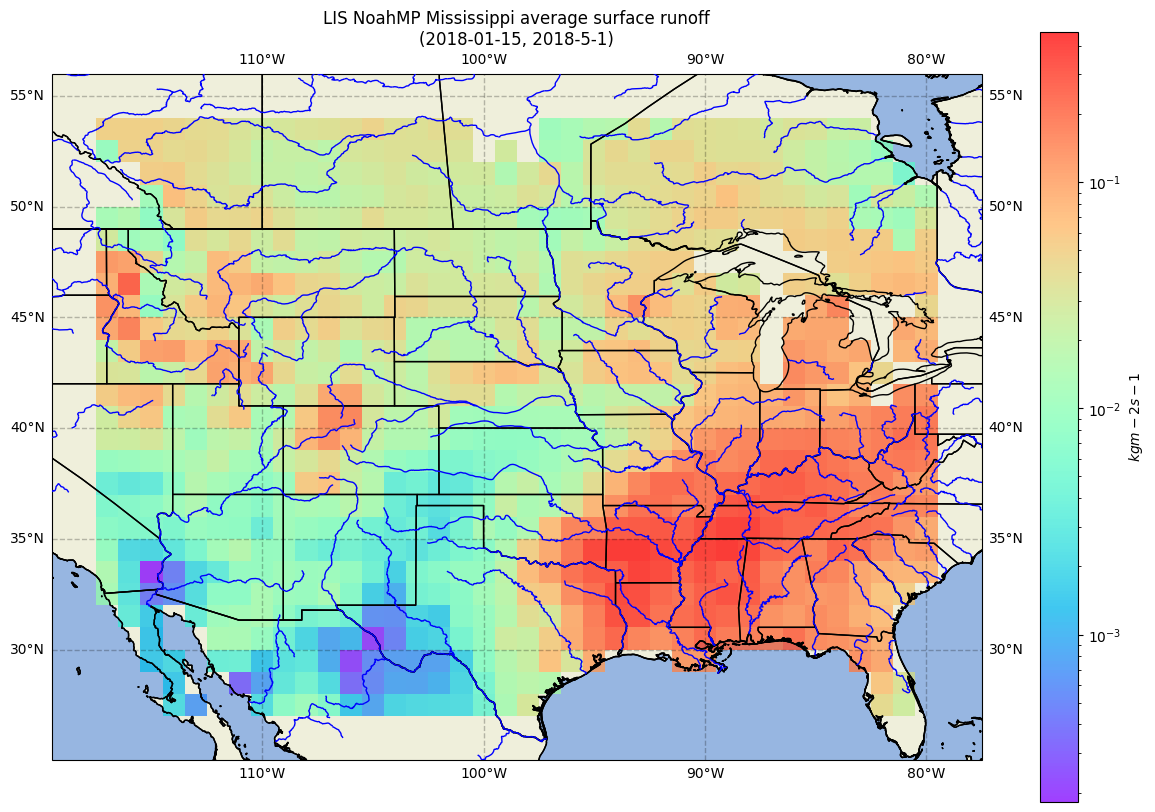

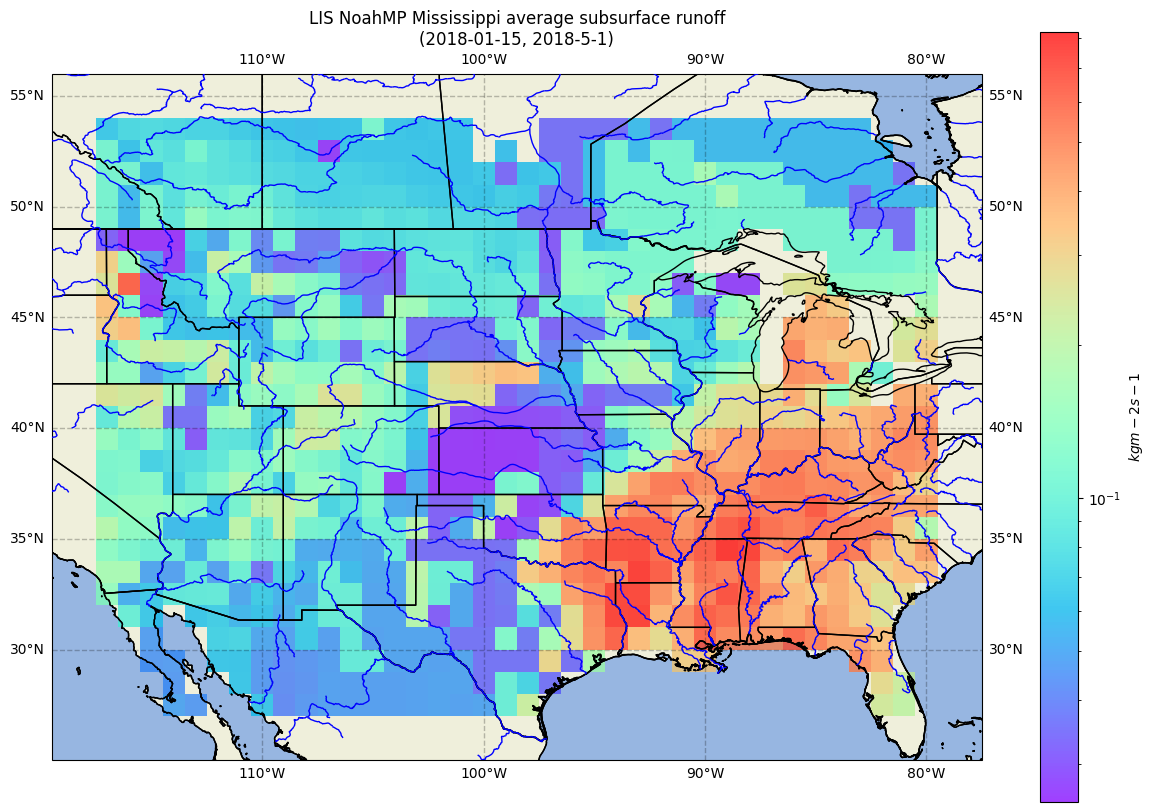

In [7]:
plotting.map_data(lis_noahmp_miss_tavg[0], 'LIS NoahMP Mississippi average surface runoff\n(2018-01-15, 2018-5-1)', cb_label='$kg m-2 s-1$', log_scale=True)
plotting.map_data(lis_noahmp_miss_tavg[1], 'LIS NoahMP Mississippi average subsurface runoff\n(2018-01-15, 2018-5-1)', cb_label='$kg m-2 s-1$', log_scale=True)

### Creating an example job based on the process result

In [8]:
basin_dropdown, precip_dropdown, scenario_dropdown, start_time_picker, end_time_picker = ocgapi_client.get_job_inputs()

Dropdown(description='Basin:', options=(('Mississippi', 74), ('Garonne', 23)), value=74)

Dropdown(description='Precip:', options=('CHIRPS', 'MERRA2', 'IMERG', 'GDAS', 'SAFRAN', 'ERA5'), value='CHIRPS…

Dropdown(description='Scenario:', options=('1x', '2x', '3x'), value='1x')

NaiveDatetimePicker(value=None, description='Start Time:')

NaiveDatetimePicker(value=None, description='End Time:')

### Triggering a new job

In [9]:
job_id = ocgapi_client.post_job(OGC_PROCESSES_BASE_URL, PROCESS_ID, VERSION, basin_dropdown.value, precip_dropdown.value, 
                                scenario_dropdown.value, start_time_picker.value, end_time_picker.value, headers)
print(job_id)

c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046


### Checking current job status

In [10]:
job_status = ocgapi_client.monitor_job(OGC_PROCESSES_BASE_URL, job_id, headers)
print(json.dumps(job_status, indent=2))

{
  "processID": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "type": "process",
  "jobID": "c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046",
  "status": "RUNNING",
  "message": "RRR:: starting",
  "created": "2024-06-17T05:51:59 +00:00",
  "started": "2024-06-17T05:52:01 +00:00",
  "finished": "1969-12-31T23:43:21 +00:00",
  "updated": "2024-06-17T05:52:01 +00:00",
  "progress": 34
}


### Checking current job status to confirm RRR is started

In [11]:
job_status = ocgapi_client.monitor_job(OGC_PROCESSES_BASE_URL, job_id, headers)
print(json.dumps(job_status, indent=2))

{
  "processID": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "type": "process",
  "jobID": "c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046",
  "status": "RUNNING",
  "message": "RRR:: starting",
  "created": "2024-06-17T05:51:59 +00:00",
  "started": "2024-06-17T05:52:01 +00:00",
  "finished": "1969-12-31T23:43:21 +00:00",
  "updated": "2024-06-17T05:52:01 +00:00",
  "progress": 34
}


### Checking current job status to confirm RRR is finished & RAPID is started

In [12]:
job_status = ocgapi_client.monitor_job(OGC_PROCESSES_BASE_URL, job_id, headers)
print(json.dumps(job_status, indent=2))

{
  "processID": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "type": "process",
  "jobID": "c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046",
  "status": "RUNNING",
  "message": "RRR:: starting",
  "created": "2024-06-17T05:51:59 +00:00",
  "started": "2024-06-17T05:52:01 +00:00",
  "finished": "1969-12-31T23:43:21 +00:00",
  "updated": "2024-06-17T05:52:01 +00:00",
  "progress": 34
}


### Checking current job status to confirm RAPID is finished

In [13]:
job_status = ocgapi_client.monitor_job(OGC_PROCESSES_BASE_URL, job_id, headers)
print(json.dumps(job_status, indent=2))

{
  "processID": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "type": "process",
  "jobID": "c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046",
  "status": "RUNNING",
  "message": "RRR:: starting",
  "created": "2024-06-17T05:51:59 +00:00",
  "started": "2024-06-17T05:52:01 +00:00",
  "finished": "1969-12-31T23:43:21 +00:00",
  "updated": "2024-06-17T05:52:01 +00:00",
  "progress": 34
}


### Getting the results

In [14]:
results = ocgapi_client.get_results(OGC_PROCESSES_BASE_URL, job_id, headers)
print(json.dumps(job_status, indent=2))

{
  "processID": "PYTHON-NOTEBOOK:EXAMPLE-API",
  "type": "process",
  "jobID": "c4368362-197a-4552-9b00-ded0f7ea71ba-2024-06-17T05:51:59.479046",
  "status": "RUNNING",
  "message": "RRR:: starting",
  "created": "2024-06-17T05:51:59 +00:00",
  "started": "2024-06-17T05:52:01 +00:00",
  "finished": "1969-12-31T23:43:21 +00:00",
  "updated": "2024-06-17T05:52:01 +00:00",
  "progress": 34
}


### Plot RAPID outputs

In [ ]:
#TODO